In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import matplotlib as mpl
# Set the font family to Arial and increase the font size for the caption
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 18

## 1. Genome profiling

In [10]:
df = pd.read_csv("genome_profile.csv", sep=";")
df.head()

,Original sample_name,Type,Total reads,Total bases (bp),Estimated coverage (X),Estimated genome size (bp),Fraction of heterozygosity rate,% of mapped reads
0,46A,Farm,170793758,25789857458,24,1055776174,0.00332,99.30
1,47A,Farm,179465290,27099258790,27,1021610273,0.00498,99.32
2,48A,Farm,193501764,29218766364,28,1057496232,0.00317,99.40
3,49A,Farm,166270979,25106917829,24,1047398167,0.00346,98.83
4,410A,Farm,202088462,30515357762,30,1021890611,0.00521,99.35


### 1.1  The genome size and heterozygosity rate over  sixty *A.rufa* sequenced genome

/tmp/ipykernel_219370/1694573328.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Estimated genome size (bp)', data=df2, palette="Set2", ax=axes[0])
/tmp/ipykernel_219370/1694573328.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Fraction of heterozygosity rate', data=df3, palette="Set2", ax=axes[1])
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Aria

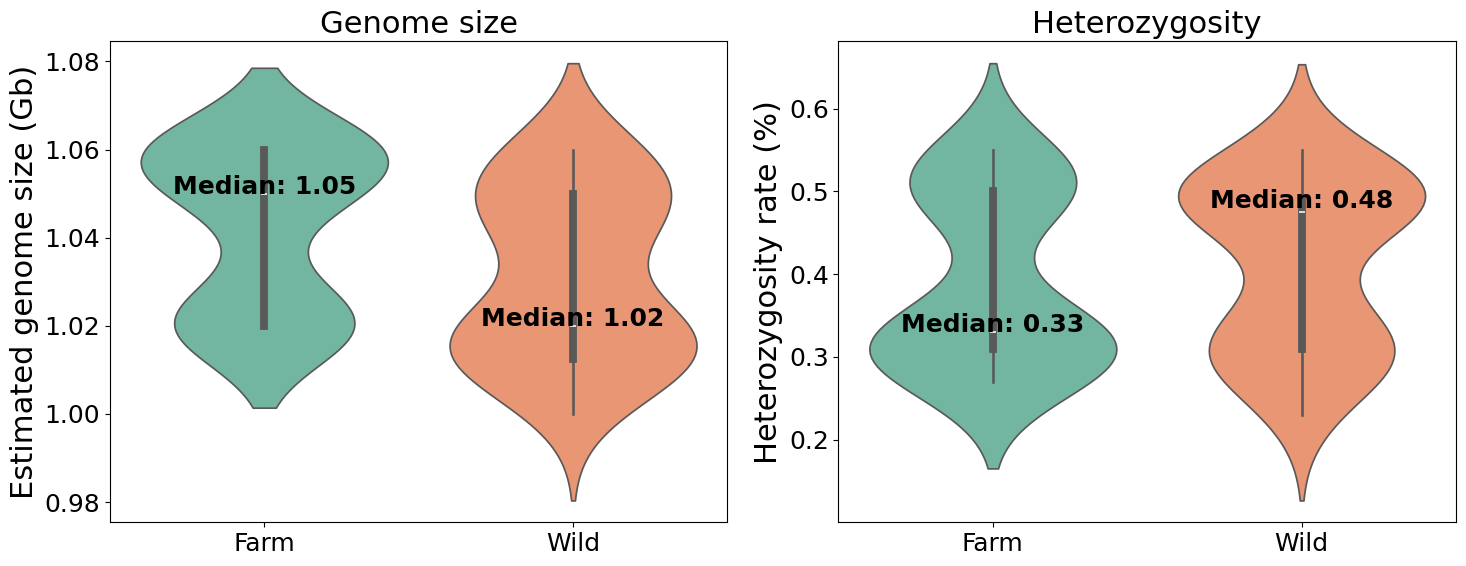

In [11]:

# Set the font family to Arial and increase the font size for the caption
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 18
# Assuming you've already loaded the data into df and df3 using pd.read_csv()

# Processing df2 and df3 (rounding and conversion)
df2 = df.loc[:, ('Original sample_name', 'Type', 'Estimated genome size (bp)')]
df2['Estimated genome size (bp)'] = df2['Estimated genome size (bp)'].div(1_000_000_000).round(2) ## coversting from (bp) to (Gb)

df3 = df.loc[:, ('Original sample_name', 'Type', 'Fraction of heterozygosity rate')]
df3['Fraction of heterozygosity rate'] = df3['Fraction of heterozygosity rate'] * 100  # Multiply by 100 ## conversinf from fraction to percent (%)
df3['Fraction of heterozygosity rate'] = df3['Fraction of heterozygosity rate'].round(2)  # Round to two decimal places

# Create the violin plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for Estimated genome size
sns.violinplot(x='Type', y='Estimated genome size (bp)', data=df2, palette="Set2", ax=axes[0])
axes[0].set_title('Genome size', fontsize=22)
axes[0].set_ylabel('Estimated genome size (Gb)', fontsize=22)

# Plot for Fraction of heterozygosity rate
sns.violinplot(x='Type', y='Fraction of heterozygosity rate', data=df3, palette="Set2", ax=axes[1])
axes[1].set_title('Heterozygosity', fontsize=22)
axes[1].set_ylabel('Heterozygosity rate (%)', fontsize=22)

# Calculate medians for df2 and df3
medians_df2 = df2.groupby('Type')['Estimated genome size (bp)'].median().round(2)
medians_df3 = df3.groupby('Type')['Fraction of heterozygosity rate'].median().round(2)

# Add median values to the plots
for ax, medians in zip(axes, [medians_df2, medians_df3]):
    for xtick in ax.get_xticks():
        ax.text(xtick, medians[df2['Type'].unique()[xtick]], f"Median: {medians[df2['Type'].unique()[xtick]]}",
                horizontalalignment='center', size='medium', color='black', weight='semibold')

# Adjust labels and aesthetics
for ax in axes:
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_xlabel('')

plt.tight_layout()

# Save the plot as an image file
plt.savefig("combined_violin_plots.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig("combined_violin_plots.pdf", bbox_inches='tight', pad_inches=0.1)
plt.savefig("combined_violin_plots.svg", bbox_inches='tight', pad_inches=0.1)

# Show the combined plot
plt.show()


### 1.2 mapping rate of those sixty sixty *A.rufa* sequenced genome against our assembled genome

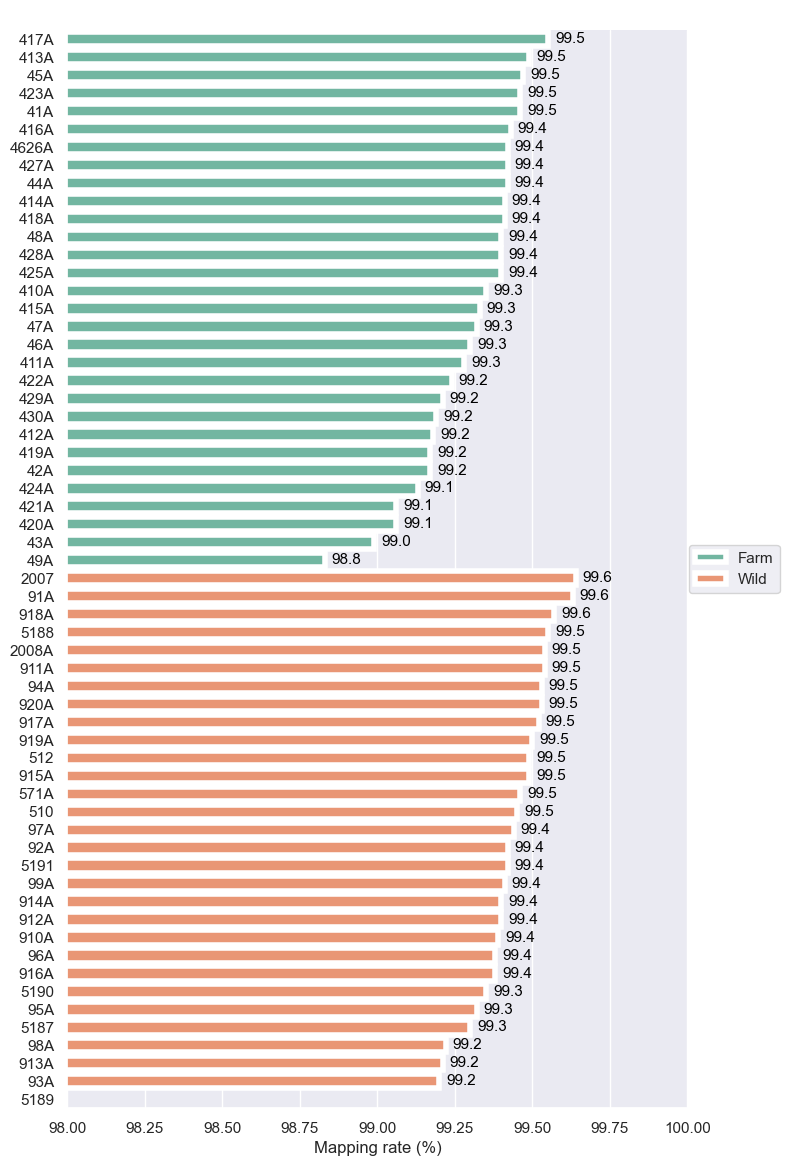

In [4]:
df4=df[['Original sample_name', 'Type','% of mapped reads']]
df4.head(5)

df4 = df4.sort_values(['Type', '% of mapped reads'], ascending=[True, False])
color_dict = {
    'BP': '#1f77b4',  # Blue
    'CC': '#ff7f0e',  # Orange
}

palette = sns.color_palette("Set2")

# Create the horizontal bar chart
plt.figure(figsize=(8, 14))
sns.set(style="darkgrid")

barplot = sns.barplot(x='% of mapped reads', y='Original sample_name', data=df4, hue='Type',
                      palette=palette, dodge=False, linewidth=4)

plt.title(' ')
plt.xlabel('Mapping rate (%)')
plt.ylabel('')
plt.legend(title='', title_fontsize=18, loc='center left', bbox_to_anchor=(0.99, 0.5))

# Make y-axis tick labels perpendicular
barplot.set_yticklabels(barplot.get_yticklabels(), rotation=0)


# Add the number at the end of the bars only for those with Total Genes greater than 10
for p in barplot.patches:
    width = p.get_width()
    if width > 1:
        barplot.annotate(f'{width:.1f}',
                         (width, p.get_y() + p.get_height() / 2),
                         ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                         textcoords='offset points')

ax = plt.gca()
ax.set_xlim([98, 100])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)

# Save the plot as a PNG file

plt.savefig("mapping_rate.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig("mapping_rate.pdf", bbox_inches='tight', pad_inches=0.1)
plt.savefig("mapping_rate.svg", bbox_inches='tight', pad_inches=0.1)

plt.show()


## 2. Functional annotation of the red legged patridge (*A.rufa*) genome

### 2.1. GO functional annotation using eggNOG

In [5]:
# read the TSV file into a pandas dataframe
df = pd.read_csv('prot_EVM.emapper.annotations.GO.txt', sep='\t', names=["query", "GO_id"])
df.head()

,query,GO_id
0,evm.model.scaffold1.3303,GO:0003674
1,evm.model.scaffold1.3303,GO:0003676
2,evm.model.scaffold1.3303,GO:0003677
3,evm.model.scaffold1.3303,GO:0003824
4,evm.model.scaffold1.3303,GO:0003964


In [6]:
## How many proteins-coding genes were assigned to GO
query_counts = df['query'].value_counts()
query_counts.describe()

count    13371.000000
mean       138.462344
std        116.814449
min          2.000000
25%         63.000000
50%        107.000000
75%        177.000000
max       1256.000000
Name: count, dtype: float64

In [7]:
## get some stats about this genes Ontology (GO)
GO_counts = df['GO_id'].value_counts()
GO_counts.describe()

count    22677.000000
mean        81.641311
std        454.985963
min          1.000000
25%          2.000000
50%          6.000000
75%         25.000000
max      12793.000000
Name: count, dtype: float64

### 2.1 Functional annotation by homology search against SwissProt, TrEMBL and NCBI.nr

In [8]:
## parsing the functional predicted homologous gene to the annotated gene model of the Alectoris rufa
def load_data(filename):
    data = pd.read_csv(filename, sep='\t', header=None, 
                       names=['Query', 'Subject', 'Identity', 'Alignment Length',
                              'Mismatches', 'Gap Openings', 'Query Start',
                              'Query End', 'Subject Start', 'Subject End',
                              'E-value', 'Bit Score'])
    return data

# Usage example:
swiss = load_data('rufa_vs_sprot_blastp.tsv')
trembl = load_data('rufa_vs_trembl_blastp.tsv')
ncbi_NR = load_data('rufa_vs_nr_blastp.tsv')

In [9]:
ncbi_NR.head()

,Query,Subject,Identity,Alignment Length,Mismatches,Gap Openings,Query Start,Query End,Subject Start,Subject End,E-value,Bit Score
0,evm.model.scaffold1.3303,XP_040509524.2,71.041,221,60,1,1,221,295,511,5.870000e-102,321.0
1,evm.model.scaffold1.724,XP_031446075.1,91.119,563,50,0,31,593,1,563,0.000000e+00,1000.0
2,evm.model.scaffold1.1752,MCQ4179290.1,85.821,402,31,1,5,380,377,778,0.000000e+00,686.0
3,evm.model.scaffold1.3519,XP_048803495.1,85.507,69,10,0,40,108,18,86,1.710000e-31,123.0
4,evm.model.scaffold1.2297,WP_266146357.1,81.879,149,26,1,31,178,45,193,3.380000e-80,246.0


In [10]:
# Merge the data based on the "Query" column in order to create unified functional annotattion file
merged_data = swiss.merge(trembl, on='Query', how='outer', suffixes=('_swiss', '_trembl')).merge(ncbi_NR, on='Query', how='outer')

## saving the file for later or downstream analysis
merged_data.to_csv('merged_annotations.tsv', sep='\t', index=False)

### Some stats about of functional annoatation from divers DB

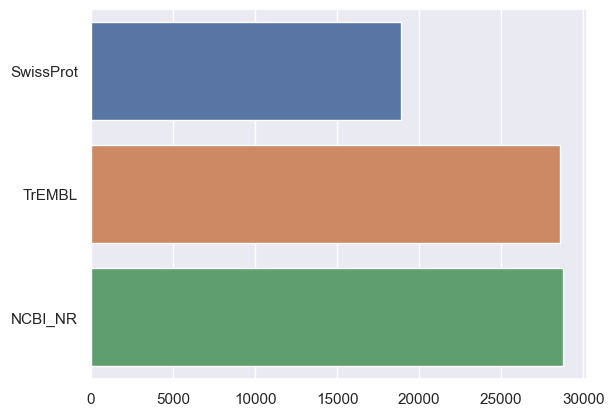

In [11]:
list[len(swiss), len(trembl), len(ncbi_NR)];

#df = pd.DataFrame({'Database': ['SwissProt', 'TrEMBL', 'NCBI_NR'],
#    'Query': [18878, 28596, 28799]})

Database = ['SwissProt', 'TrEMBL', 'NCBI_NR']
Annotated_Query = [18878, 28596, 28799]

sns.barplot(x= Annotated_Query, y= Database)
plt.show()

### Unique and shared functional annotated *A. rufa* genes

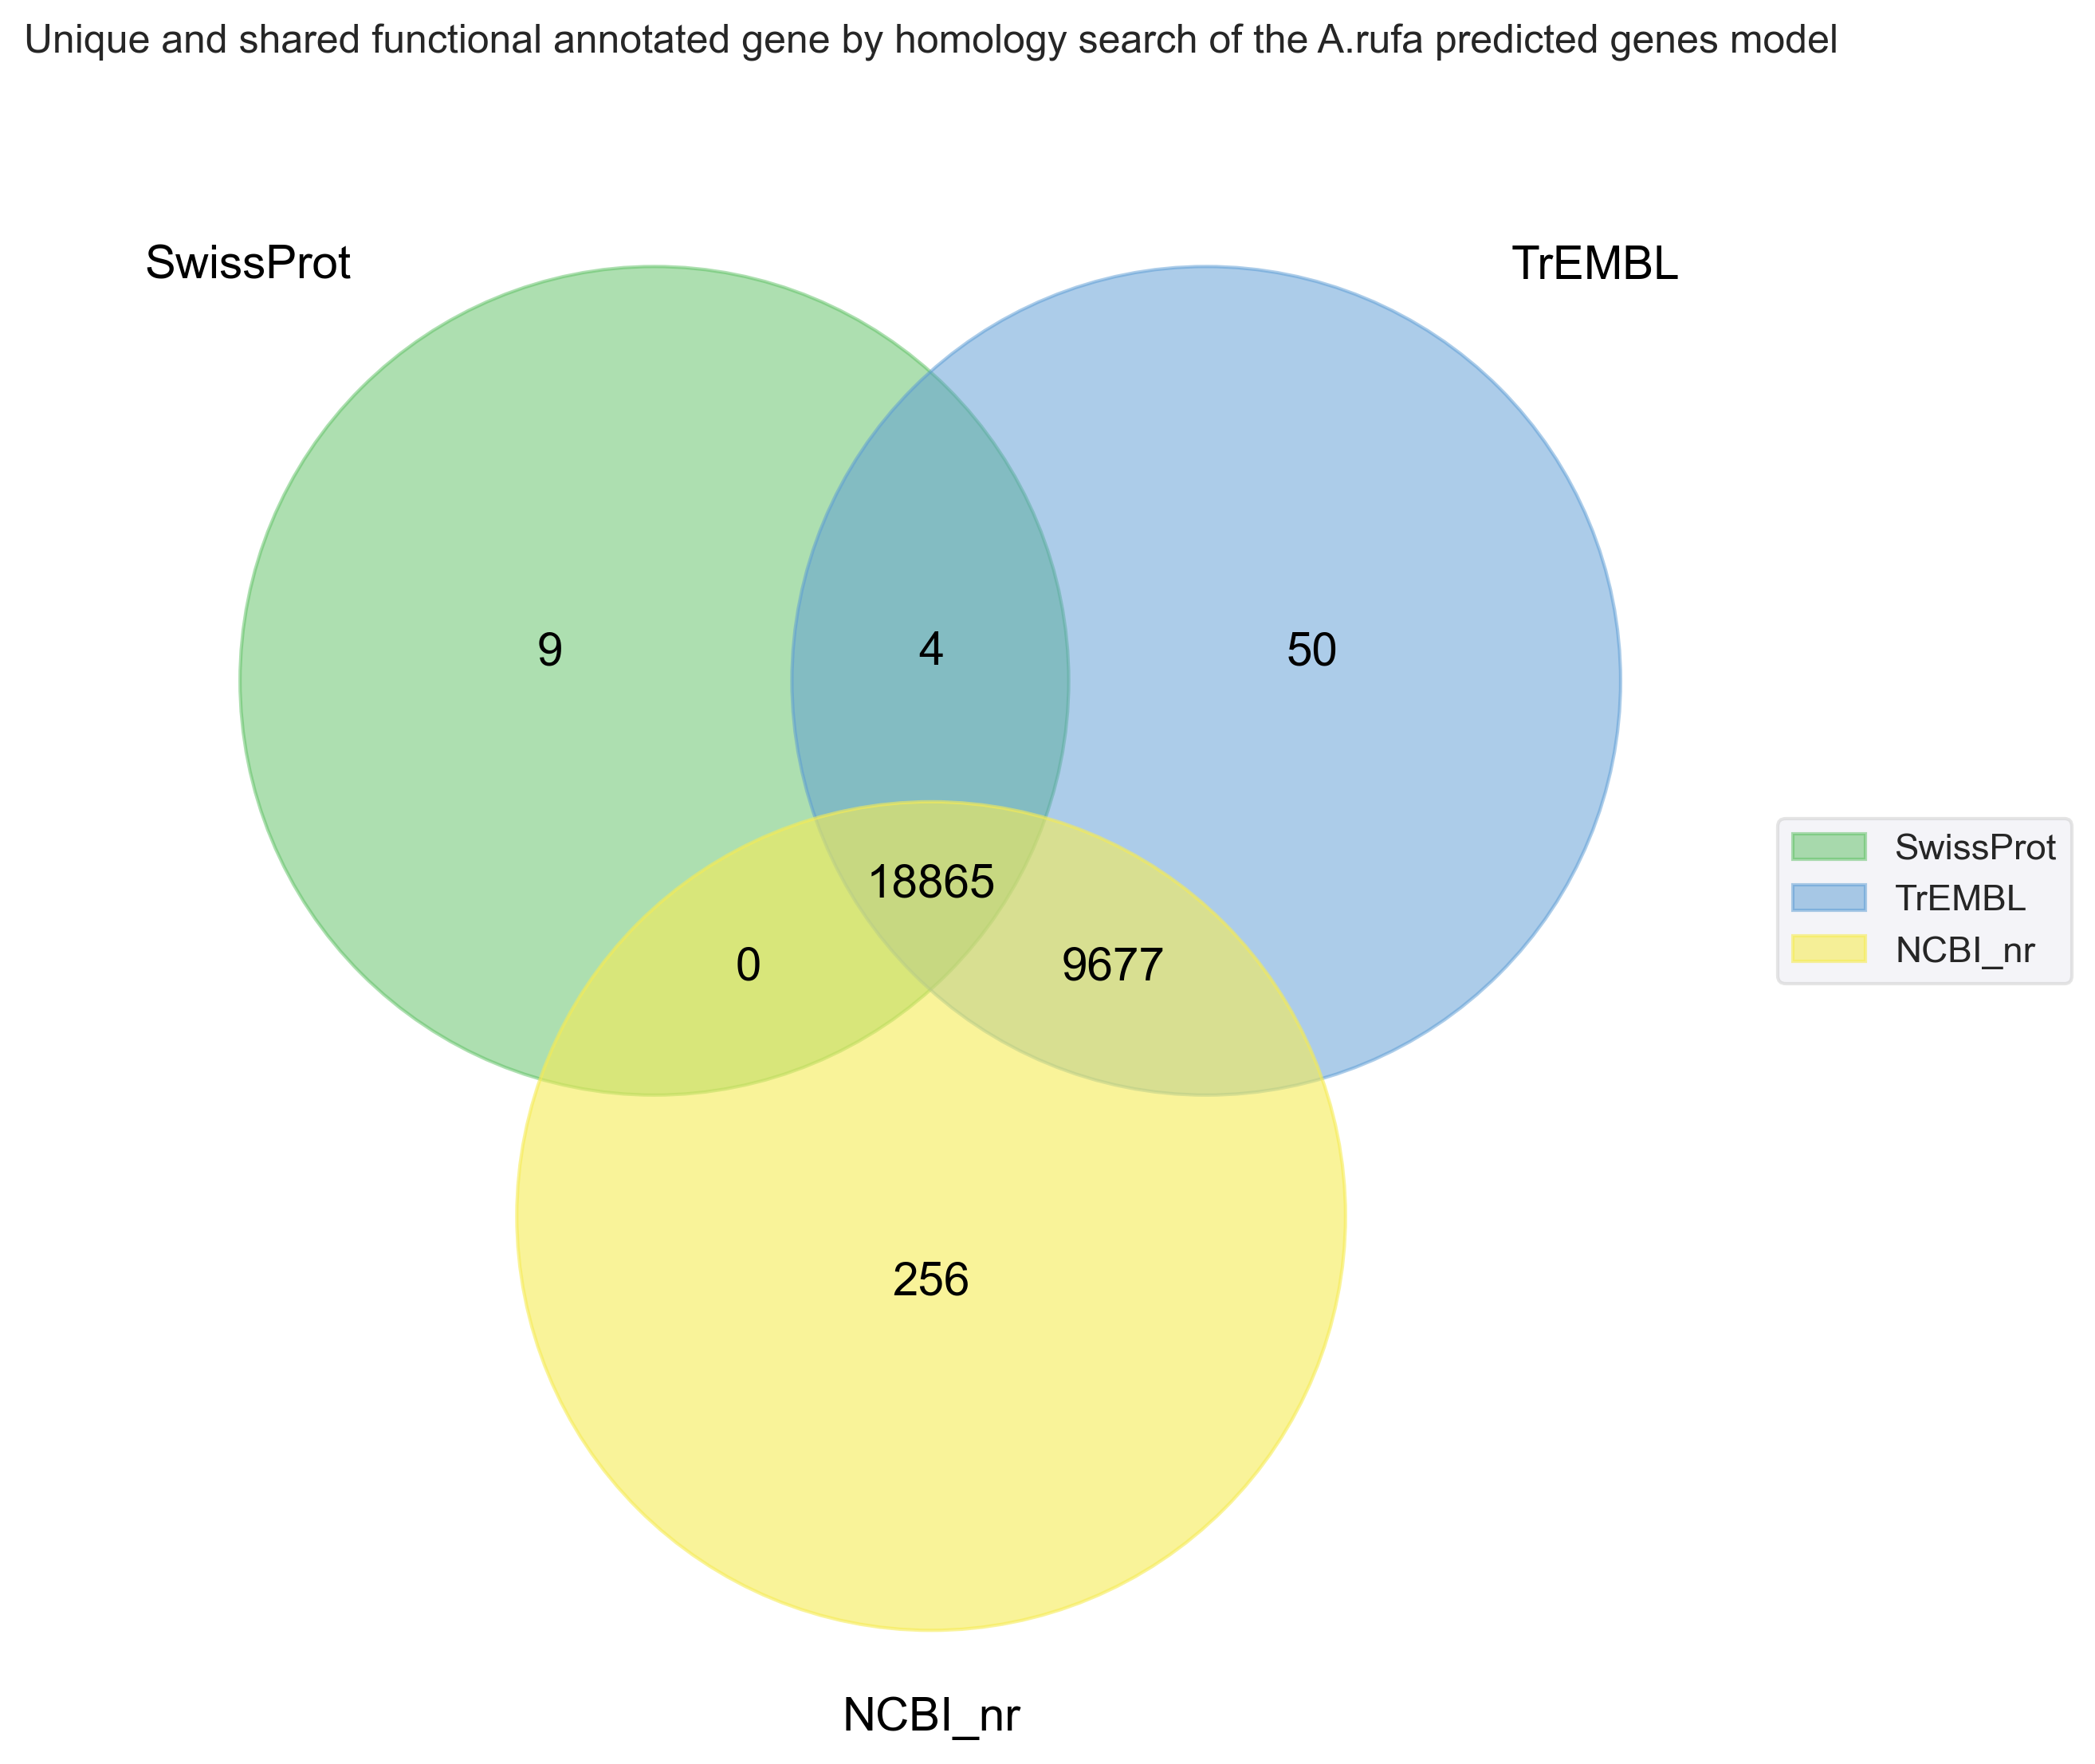

In [12]:
%matplotlib inline
import venn

swiss_queries = set(swiss['Query'].tolist())
trembl_queries = set(trembl['Query'].tolist())
ncbi_NR_queries = set(ncbi_NR['Query'].tolist())

# Plotting Venn diagram
labels = venn.get_labels([swiss_queries, trembl_queries, ncbi_NR_queries])
fig, ax = venn.venn3(labels, names=['SwissProt', 'TrEMBL', 'NCBI_nr'], dpi=300)

plt.title('Unique and shared functional annotated gene by homology search of the A.rufa predicted genes model')
# Save the plot in PDF, PNG, and SVG formats

plt.savefig('venn_func_ann.pdf', format='pdf', bbox_inches='tight')
plt.savefig('venn_func_ann.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('venn_func_ann.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

## GO functional of gene families of the Alectoris rufa genome in comparision to other close related birds

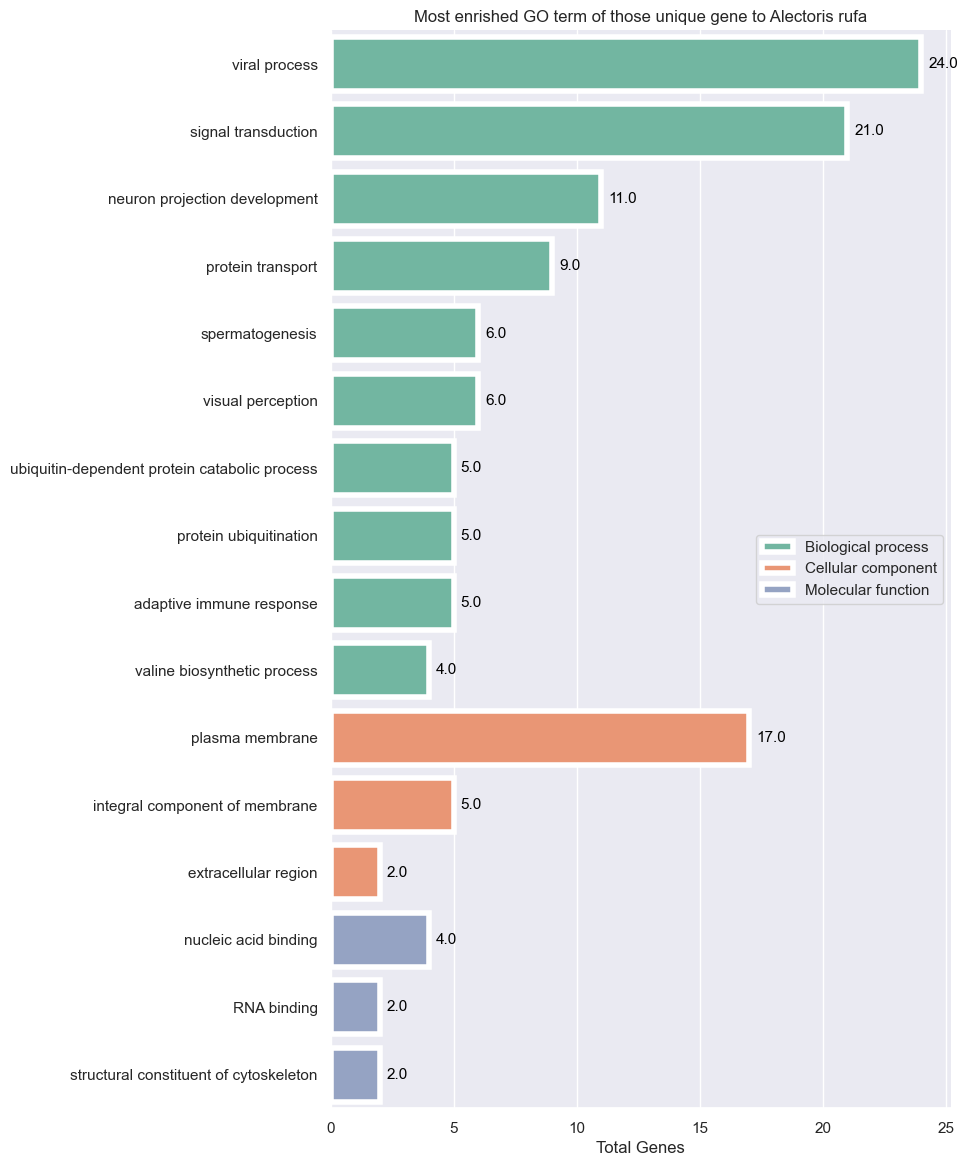

In [13]:
data_file = 'GO_enr.csv'  # Replace with your file name or path
data = pd.read_csv(data_file)

# Strip extra spaces
data['Categori_GO'] = data['Categori_GO'].str.strip()

# Filter out the data
data = data[~((data['Categori_GO'] == 'Biological process') & (data['Tota_genes'] <= 2))]

# Sort the data first by 'Categori_GO' and then by 'Tota_genes' in descending order
data = data.sort_values(['Categori_GO', 'Tota_genes'], ascending=[True, False])

color_dict = {
    'BP': '#1f77b4',  # Blue
    'CC': '#ff7f0e',  # Orange
    'MF': '#2ca02c',  # Green
}
palette = sns.color_palette("Set2")


# Create the horizontal bar chart
plt.figure(figsize=(8, 14))

barplot = sns.barplot(x='Tota_genes', y='biologial function', data=data, hue='Categori_GO', palette=palette, dodge=False, linewidth=4)

plt.title('Most enrished GO term of those unique gene to Alectoris rufa')
plt.xlabel('Total Genes')
plt.ylabel('')
plt.legend(title='', title_fontsize=14, loc=7)

# Make y-axis tick labels perpendicular
barplot.set_yticklabels(barplot.get_yticklabels(), rotation=0)

# Add the number at the end of the bars.
for p in barplot.patches:
    width = p.get_width()
    if width > 1:
        barplot.annotate(f'{width:.1f}',
                         (width, p.get_y() + p.get_height() / 2),
                         ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                         textcoords='offset points')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)

# Save the plot as a PNG file

plt.savefig("enrished_GO_term.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig("enrished_GO_term.pdf", bbox_inches='tight', pad_inches=0.1)
plt.savefig("enrished_GO_term.svg", bbox_inches='tight', pad_inches=0.1)

plt.show()


## KEGG functional annotation using KofamKOALA

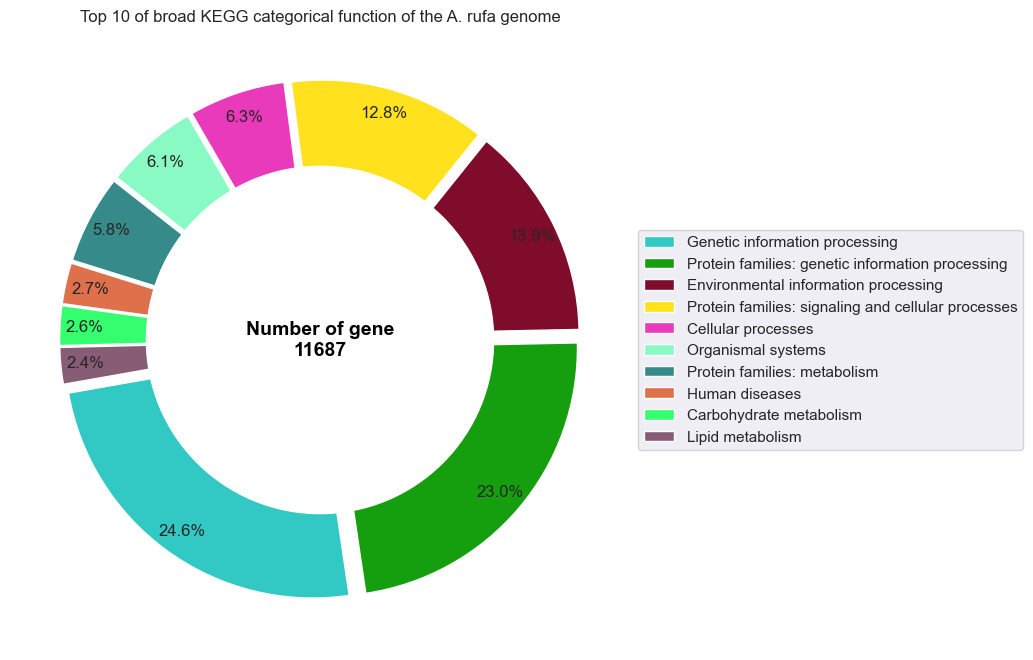

In [14]:

df3 = pd.read_csv('Top_10_Broads KEGG_ functional_cate.txt', delimiter='\t', header=None, names=['KEGG_cat', 'Genes'])

KEGG_cat = df3["KEGG_cat"].head(10)
total_gene = df3["Genes"].head(10)

# Calculate the total number of genes
total_genes = total_gene.sum()

# Plot a pie chart for the top 10 values with labels
colors = ["#32C9C4", "#159F0F", "#800C2C", "#FFE21D",
          "#E93ABC", "#89FAC4", "#368B8A",
          "#DE714B", "#35FF6F", "#875C75"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(8, 14))
plt.pie(total_gene, autopct='%1.1f%%', startangle=190, colors=colors,
        pctdistance=0.90, explode=explode)

# Add a white circle with the total number of genes
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add the total gene count text with Arial font
font_props = {'family': 'Arial', 'size': 14, 'color': 'black'}
plt.text(0, 0, f'Number of gene\n{total_genes}', ha='center', va='center', fontdict=font_props, fontweight='bold')

# Add a title
plt.title('Top 10 of broad KEGG categorical function of the A. rufa genome')

# Move the legend to the right and adjust its position
legend = plt.legend(labels=KEGG_cat, loc='center left', bbox_to_anchor=(1, 0.5))

# Save as SVG and PNG
plt.savefig('Broad_KEGG_funt_cat.svg', format='svg', dpi=600, bbox_inches='tight')
plt.savefig('Broad_KEGG_funt_cat.png', format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


### Top five KEGG orthogos found in the genome of *Alectoris rufa*

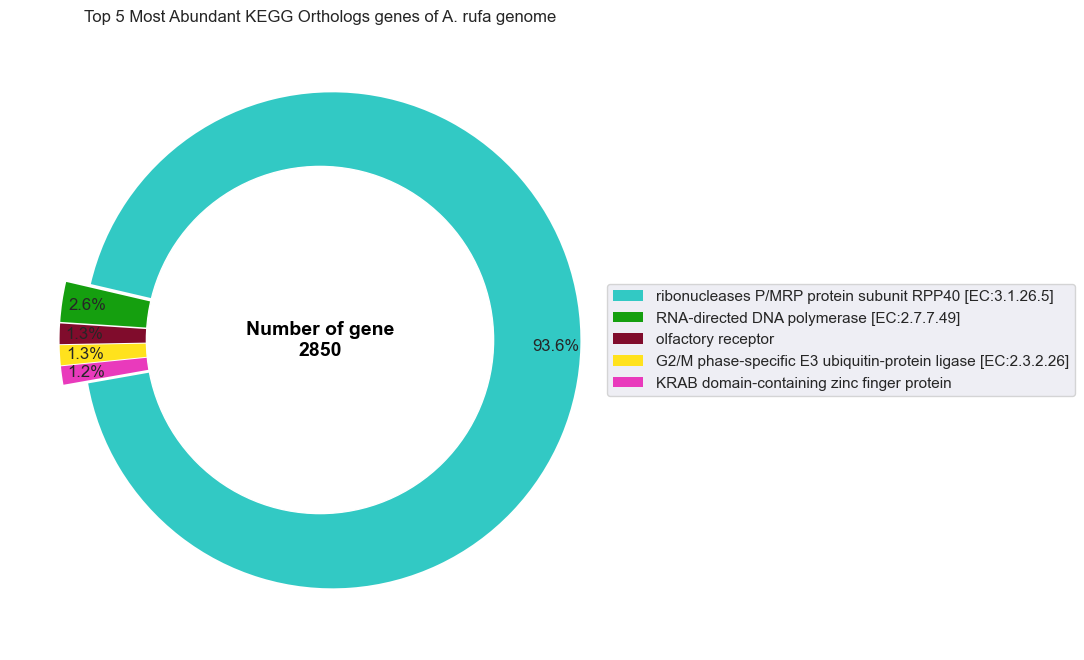

In [15]:
df2 = pd.read_csv('ko.txt', delimiter='\t', header=None, names=['gene', 'KO', 'thrshld', 'score', 'E-value', 'Definition'])
column2 = df2['Definition']

# Count the unique values in KO and select the top 5
top_5_values = column2.value_counts().head(5)
total_genes = top_5_values.sum()

# Plot a pie chart for the top 5 values with labels
colors = ["#32C9C4", "#159F0F", "#800C2C", "#FFE21D", "#E93ABC"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(8, 14))
# Set wedgeprops to make the pie chart transparent
wedgeprops = {'edgecolor': 'none'}
plt.pie(top_5_values, autopct='%1.1f%%', startangle=190, colors=colors,
        pctdistance=0.90, explode=explode, wedgeprops=wedgeprops)

# Add a white circle with the total number of genes
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add the total gene count text with Arial font
font_props = {'family': 'Arial', 'size': 14, 'color': 'black', 'backgroundcolor': 'none'}
plt.text(0, 0, f'Number of gene\n{total_genes}', ha='center', va='center', fontdict=font_props, fontweight='bold')

# Add a title
plt.title('Top 5 Most Abundant KEGG Orthologs genes of A. rufa genome')
plt.legend(labels=top_5_values.index, loc='center left', bbox_to_anchor=(0.95, 0.5))

# Save as SVG and PNG
plt.savefig('KEGG_top_5.svg', format='svg', dpi=600, bbox_inches='tight')
plt.savefig('KEGG_top_5.png', format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()
